In [1]:
import pandas as pd 

citations_df = pd.read_csv("../data/processed/citations.csv")

In [2]:
citations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265726 entries, 0 to 265725
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   paper_id              265726 non-null  int64  
 1   raw                   265644 non-null  object 
 2   context               265726 non-null  object 
 3   co_cited_count        265726 non-null  int64  
 4   section_id            259027 non-null  object 
 5   paragraph_id          265684 non-null  object 
 6   sentence_id           265726 non-null  object 
 7   sentence_seq_number   265726 non-null  int64  
 8   reference_seq_number  265726 non-null  int64  
 9   author                227628 non-null  object 
 10  page                  74403 non-null   float64
 11  year                  222883 non-null  float64
 12  title                 265726 non-null  object 
 13  filename              265726 non-null  object 
 14  sentence_count        265726 non-null  int64  
 15  

In [3]:
citations_df.head()

,paper_id,raw,context,co_cited_count,section_id,paragraph_id,sentence_id,sentence_seq_number,reference_seq_number,author,page,year,title,filename,sentence_count,reference_count,source title,similarity
0,1,Streissler (1972),"In particular, as the classic contributions of...",0,_gzuY8cP,_NwgSU35,_TMX2wdg,4,1,Streissler,NaN,1972.0,Unknown Title,10.1002.9780470999059.ch17.pdf.grobid.tei.xml,298,20,Review of Austrian Economics,44.444444
1,1,"(Menger, [1981] 1871, p. 49)",The final two paragraphs of the preface are a ...,1,_NytzfyY,_Z99Bvn5,_aJz9uAb,10,2,Menger,49.0,1981.0,Unknown Title,10.1002.9780470999059.ch17.pdf.grobid.tei.xml,298,20,Review of Austrian Economics,44.444444
2,1,"1871, p. 49)",The final two paragraphs of the preface are a ...,1,_NytzfyY,_Z99Bvn5,_aJz9uAb,10,3,NaN,49.0,1871.0,Unknown Title,10.1002.9780470999059.ch17.pdf.grobid.tei.xml,298,20,Review of Austrian Economics,44.444444
3,1,"(Menger, [1981] 1871, p. 48)",He also goes to some length in the preface to ...,0,_NytzfyY,_Z99Bvn5,_54sgkMV,11,4,Menger,48.0,1981.0,Unknown Title,10.1002.9780470999059.ch17.pdf.grobid.tei.xml,298,20,Review of Austrian Economics,44.444444
4,1,Menger's (1985Menger's ( [1883] ] ),A detour into Menger's (1985Menger's ( [1883] ...,0,_NytzfyY,_ZYekVnE,_F7mv66u,16,5,Menger,NaN,1883.0,Unknown Title,10.1002.9780470999059.ch17.pdf.grobid.tei.xml,298,20,Review of Austrian Economics,44.444444


In [4]:
import pandas as pd

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")

# Garante que page é NaN de verdade quando vazia
citations_df["page"] = citations_df["page"].replace("", pd.NA)

author_page_stats = (
    citations_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby("author")
    .agg(
        total_citations=("author", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page=lambda df: 100 * df["citations_with_page"] / df["total_citations"]
    )
    .sort_values("total_citations", ascending=False)
)

author_page_stats.head(20)


,total_citations,citations_with_page,pct_with_page
author,,,
Mises,7754,4791,61.787465
Hayek,6281,3124,49.737303
Kirzner,3013,1161,38.533024
Rothbard,2647,1473,55.647903
Schumpeter,1992,870,43.674699
Boettke,1629,514,31.553100
Buchanan,1485,700,47.138047
Smith,1404,581,41.381766
Menger,1290,806,62.480620


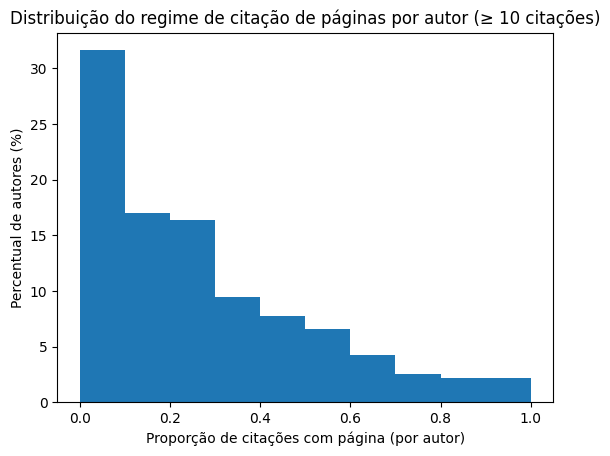

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# garante NaN correto
citations_df["page"] = citations_df["page"].replace("", pd.NA)

author_page_stats = (
    citations_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby("author")
    .agg(
        total_citations=("author", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page=lambda df: df["citations_with_page"] / df["total_citations"]
    )
)

# restringe a autores com pelo menos 10 citações
author_page_stats = author_page_stats[
    author_page_stats["total_citations"] >= 10
]

# bins de 0.1 em 0.1
bins = np.arange(0, 1.1, 0.1)

# pesos para porcentagem
weights = np.ones(len(author_page_stats)) / len(author_page_stats) * 100

plt.figure()
plt.hist(
    author_page_stats["pct_with_page"],
    bins=bins,
    weights=weights
)

plt.xlabel("Proporção de citações com página (por autor)")
plt.ylabel("Percentual de autores (%)")
plt.title("Distribuição do regime de citação de páginas por autor (≥ 10 citações)")
plt.show()


In [6]:
import pandas as pd

# garante NaN correto
citations_df["page"] = citations_df["page"].replace("", pd.NA)

paper_page_stats = (
    citations_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby("paper_id")
    .agg(
        total_citations=("paper_id", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page=lambda df: df["citations_with_page"] / df["total_citations"]
    )
)

paper_page_stats.head()


,total_citations,citations_with_page,pct_with_page
paper_id,,,
1,42,26,0.619048
2,34,4,0.117647
3,109,0,0.000000
4,155,0,0.000000
5,83,4,0.048193


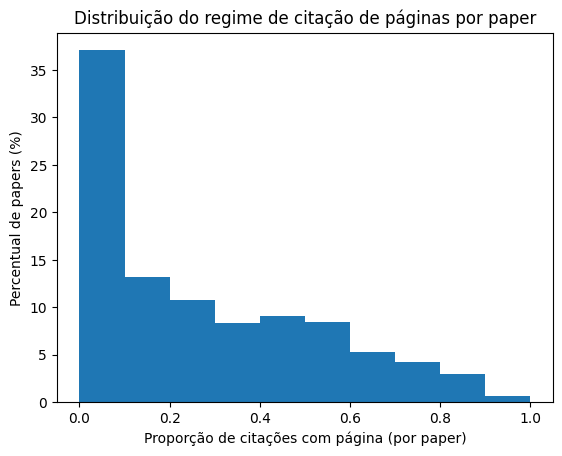

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# garante NaN correto
citations_df["page"] = citations_df["page"].replace("", pd.NA)

paper_page_stats = (
    citations_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby("paper_id")
    .agg(
        total_citations=("paper_id", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page=lambda df: df["citations_with_page"] / df["total_citations"]
    )
)

# bins de 0.1 em 0.1
bins = np.arange(0, 1.1, 0.1)

# pesos para transformar contagem em porcentagem
weights = np.ones(len(paper_page_stats)) / len(paper_page_stats) * 100

plt.figure()
plt.hist(
    paper_page_stats["pct_with_page"],
    bins=bins,
    weights=weights
)

plt.xlabel("Proporção de citações com página (por paper)")
plt.ylabel("Percentual de papers (%)")
plt.title("Distribuição do regime de citação de páginas por paper")
plt.show()


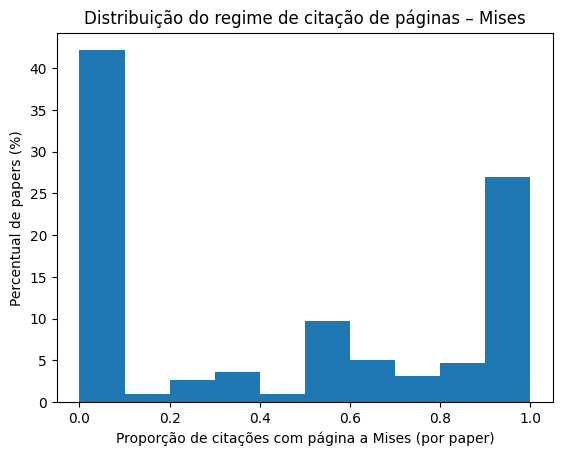

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# garante NaN correto
citations_df["page"] = citations_df["page"].replace("", pd.NA)

# filtra apenas citações a Mises
mises_df = citations_df[citations_df["author"] == "Mises"]

paper_page_stats_mises = (
    mises_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby("paper_id")
    .agg(
        total_citations=("paper_id", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page=lambda df: df["citations_with_page"] / df["total_citations"]
    )
)

# bins de 0.1 em 0.1
bins = np.arange(0, 1.1, 0.1)

# pesos para porcentagem
weights = np.ones(len(paper_page_stats_mises)) / len(paper_page_stats_mises) * 100

plt.figure()
plt.hist(
    paper_page_stats_mises["pct_with_page"],
    bins=bins,
    weights=weights
)

plt.xlabel("Proporção de citações com página a Mises (por paper)")
plt.ylabel("Percentual de papers (%)")
plt.title("Distribuição do regime de citação de páginas – Mises")
plt.show()


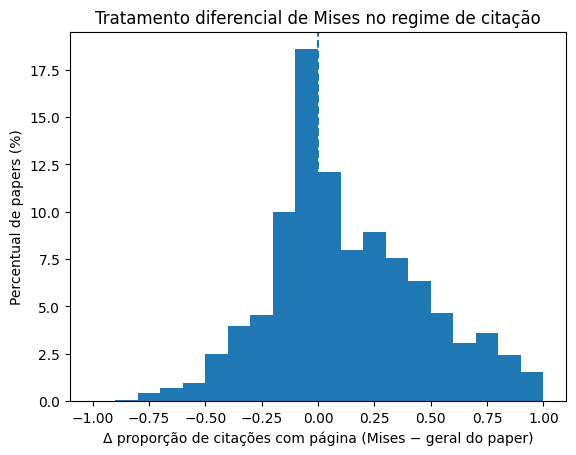

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# garante NaN correto
citations_df["page"] = citations_df["page"].replace("", pd.NA)

# =========================
# 1) Regime geral por paper
# =========================
paper_general = (
    citations_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby("paper_id")
    .agg(
        total_citations=("paper_id", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page_general=lambda df: df["citations_with_page"] / df["total_citations"]
    )
    [["pct_with_page_general"]]
)

# =========================
# 2) Regime Mises por paper
# =========================
mises_df = citations_df[citations_df["author"] == "Mises"]

paper_mises = (
    mises_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby("paper_id")
    .agg(
        total_citations=("paper_id", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page_mises=lambda df: df["citations_with_page"] / df["total_citations"]
    )
    [["pct_with_page_mises"]]
)

# =========================
# 3) Combina e calcula delta
# =========================
paper_delta = (
    paper_general
    .join(paper_mises, how="inner")  # só papers que citam Mises
    .assign(
        delta_pct=lambda df: df["pct_with_page_mises"] - df["pct_with_page_general"]
    )
)

# =========================
# 4) Histograma do delta
# =========================
bins = np.arange(-1.0, 1.1, 0.1)

weights = np.ones(len(paper_delta)) / len(paper_delta) * 100

plt.figure()
plt.hist(
    paper_delta["delta_pct"],
    bins=bins,
    weights=weights
)

plt.axvline(0, linestyle="--")
plt.xlabel("Δ proporção de citações com página (Mises − geral do paper)")
plt.ylabel("Percentual de papers (%)")
plt.title("Tratamento diferencial de Mises no regime de citação")
plt.show()


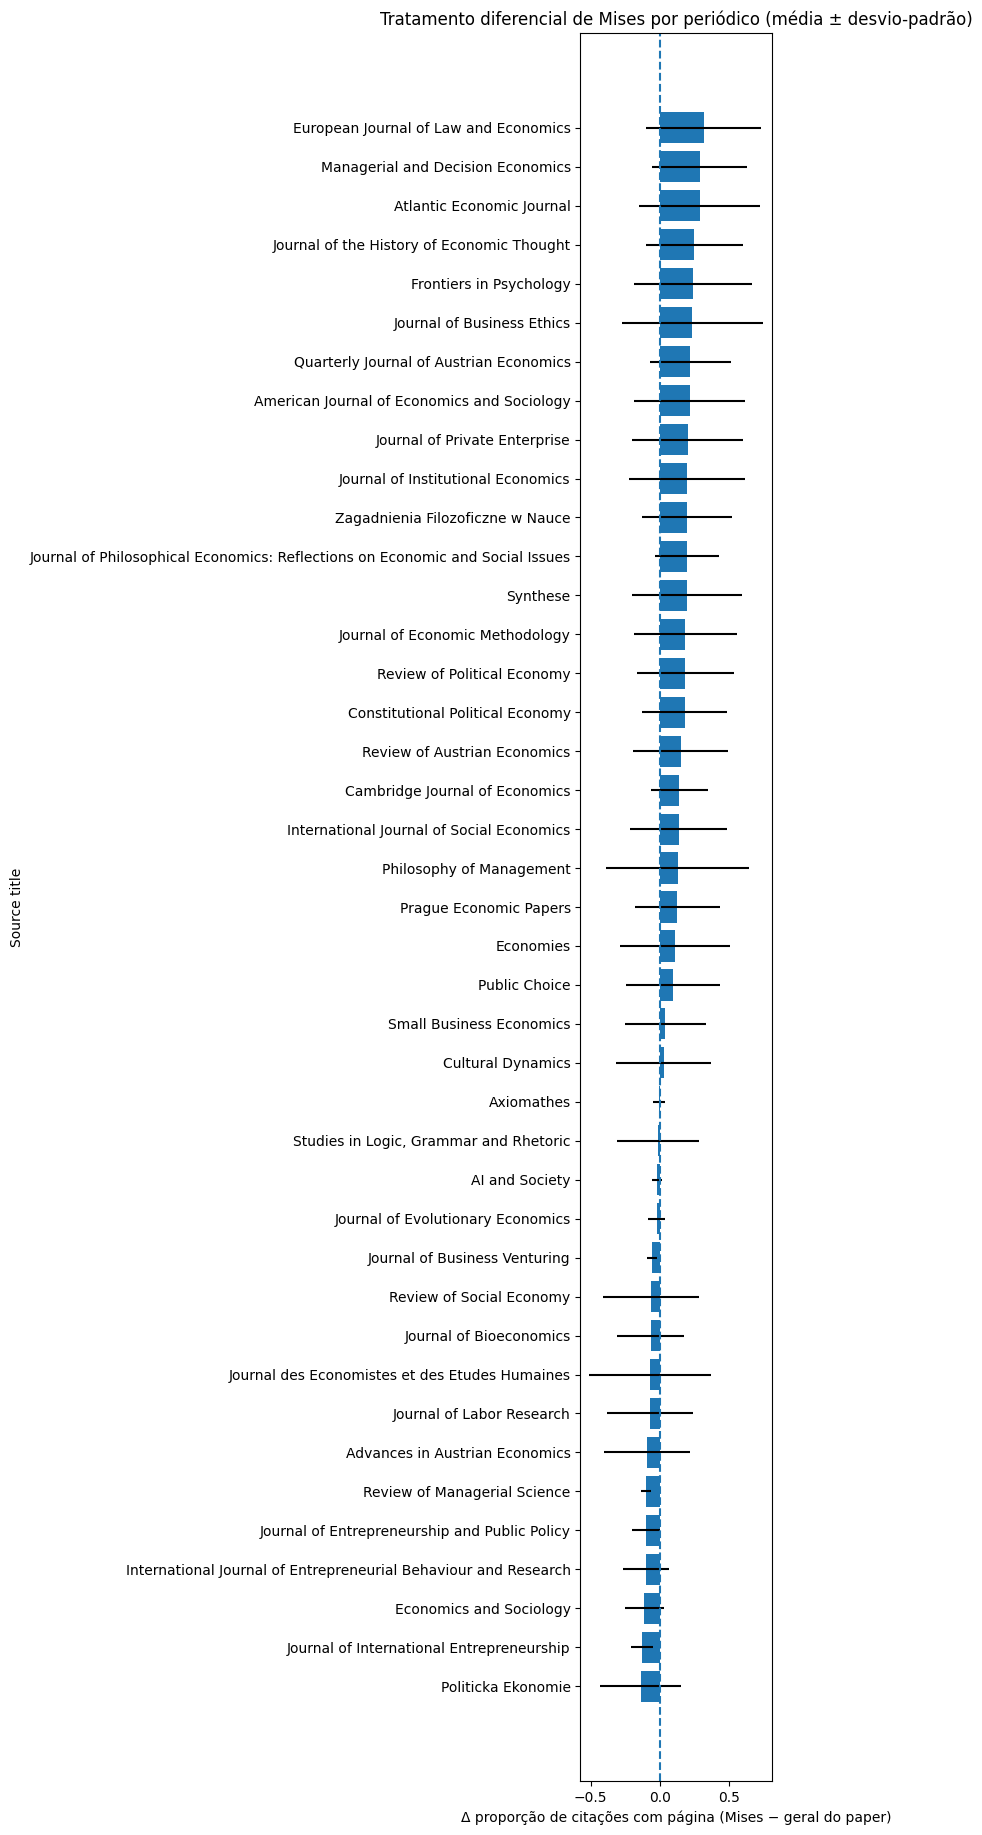

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# garante NaN correto
citations_df["page"] = citations_df["page"].replace("", pd.NA)

# =========================
# 1) Regime geral por paper
# =========================
paper_general = (
    citations_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby(["paper_id", "source title"])
    .agg(
        total_citations=("paper_id", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page_general=lambda df: df["citations_with_page"] / df["total_citations"]
    )
    [["pct_with_page_general"]]
)

# =========================
# 2) Regime Mises por paper
# =========================
mises_df = citations_df[citations_df["author"] == "Mises"]

paper_mises = (
    mises_df
    .assign(has_page=lambda df: df["page"].notna())
    .groupby("paper_id")
    .agg(
        total_citations=("paper_id", "size"),
        citations_with_page=("has_page", "sum")
    )
    .assign(
        pct_with_page_mises=lambda df: df["citations_with_page"] / df["total_citations"]
    )
)

# =========================
# 3) Delta por paper
# =========================
paper_delta = (
    paper_general
    .join(paper_mises, how="inner")
    .assign(
        delta_pct=lambda df: df["pct_with_page_mises"] - df["pct_with_page_general"]
    )
    .reset_index()
)

# =========================
# 4) Agrega por periódico
# =========================
source_delta = (
    paper_delta
    .groupby("source title")
    .agg(
        mean_delta=("delta_pct", "mean"),
        std_delta=("delta_pct", "std"),
        n_papers=("delta_pct", "size")
    )
    .query("n_papers >= 5")      # filtro mínimo
    .sort_values("mean_delta")
)

# =========================
# 5) Gráfico horizontal com erro
# =========================
plt.figure(figsize=(8, max(4, 0.45 * len(source_delta))))

plt.barh(
    source_delta.index,
    source_delta["mean_delta"],
    xerr=source_delta["std_delta"]
)

plt.axvline(0, linestyle="--")
plt.xlabel("Δ proporção de citações com página (Mises − geral do paper)")
plt.ylabel("Source title")
plt.title("Tratamento diferencial de Mises por periódico (média ± desvio-padrão)")

plt.tight_layout()
plt.show()
